In [1]:
import pandas as pd 
import numpy as np 
from pandas import Series
from pandas import DataFrame
from math import sqrt
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas import concat
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import lag_plot

from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# BSE HDFC Bank ltd - 5 years Daily stock prices Dataset

In [2]:
# Data has been taken from the link 
#https://www.quandl.com/data/BSE/BOM500180-HDFC-Bank-Ltd-EOD-Prices

In [3]:
df = pd.read_csv('BSE-BOM500180.csv', header=0)
df.head()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
0,2019-08-27,2259.9,2272.40,2240.8,2259.40,2257.18,224325.0,10469.0,506341742.0,128414.0,57.24,31.60,-0.50
1,2019-08-26,2204.9,2265.00,2167.5,2255.95,2222.82,212103.0,10323.0,471466637.0,65021.0,30.66,97.50,51.05
2,2019-08-23,2161.6,2176.30,2139.5,2163.25,2155.88,102065.0,5123.0,220039546.0,23785.0,23.30,36.80,1.65
3,2019-08-22,2226.0,2226.00,2168.0,2173.75,2198.75,94266.0,6623.0,207267064.0,46995.0,49.85,58.00,-52.25
4,2019-08-21,2217.0,2241.05,2214.7,2226.00,2228.86,80280.0,4236.0,178932906.0,36123.0,45.00,26.35,9.00


In [4]:
df.tail()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
1228,2014-09-03,862.00,863.80,851.90,856.65,858.688938,239325.0,6764.0,205505730.0,101423.0,42.38,11.90,-5.35
1229,2014-09-02,840.15,860.80,839.30,858.50,855.300763,259124.0,7397.0,221628955.0,119587.0,46.15,21.50,18.35
1230,2014-09-01,846.00,849.05,839.00,841.55,843.473773,96675.0,4072.0,81542827.0,28809.0,29.80,10.05,-4.45
1231,2014-08-28,842.00,844.20,833.55,842.95,839.414370,122557.0,3353.0,102876107.0,43569.0,35.55,10.65,0.95
1232,2014-08-27,846.90,847.00,834.75,836.60,838.601772,119198.0,4082.0,99959654.0,52710.0,44.22,12.25,-10.30


In [5]:
df.dtypes

Date                          object
Open                         float64
High                         float64
Low                          float64
Close                        float64
WAP                          float64
No. of Shares                float64
No. of Trades                float64
Total Turnover               float64
Deliverable Quantity         float64
% Deli. Qty to Traded Qty    float64
Spread H-L                   float64
Spread C-O                   float64
dtype: object

In [6]:
# Hence Date is in Object conveting in to datetime format

In [7]:
df['Date']=pd.to_datetime(df['Date'])
df=df.set_index('Date')
df.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2019-08-27,2259.9,2272.40,2240.8,2259.40,2257.18,224325.0,10469.0,506341742.0,128414.0,57.24,31.60,-0.50
2019-08-26,2204.9,2265.00,2167.5,2255.95,2222.82,212103.0,10323.0,471466637.0,65021.0,30.66,97.50,51.05
2019-08-23,2161.6,2176.30,2139.5,2163.25,2155.88,102065.0,5123.0,220039546.0,23785.0,23.30,36.80,1.65
2019-08-22,2226.0,2226.00,2168.0,2173.75,2198.75,94266.0,6623.0,207267064.0,46995.0,49.85,58.00,-52.25
2019-08-21,2217.0,2241.05,2214.7,2226.00,2228.86,80280.0,4236.0,178932906.0,36123.0,45.00,26.35,9.00


In [8]:
df.shape

(1233, 12)

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,1233.0,1.527840e+03,4.823240e+02,8.401500e+02,1.070000e+03,1.393000e+03,1.967900e+03,2.499900e+03
High,1233.0,1.538400e+03,4.852372e+02,8.442000e+02,1.079000e+03,1.398500e+03,1.982000e+03,2.502900e+03
Low,1233.0,1.514853e+03,4.787215e+02,8.335500e+02,1.060350e+03,1.379950e+03,1.949250e+03,2.484250e+03
Close,1233.0,1.526731e+03,4.816837e+02,8.366000e+02,1.069300e+03,1.389850e+03,1.966600e+03,2.494350e+03
WAP,1233.0,1.526638e+03,4.818371e+02,8.386018e+02,1.071385e+03,1.390510e+03,1.966500e+03,2.495970e+03
No. of Shares,1233.0,1.474803e+05,3.033865e+05,1.313000e+04,5.187800e+04,8.051800e+04,1.429350e+05,5.524506e+06
No. of Trades,1233.0,3.378734e+03,3.091171e+03,6.620000e+02,1.703000e+03,2.494000e+03,4.010000e+03,6.070100e+04
Total Turnover,1233.0,2.248778e+08,5.013447e+08,1.959625e+07,7.541903e+07,1.222195e+08,2.125770e+08,7.821066e+09
Deliverable Quantity,1231.0,7.486215e+04,2.002987e+05,5.048000e+03,1.795200e+04,3.010200e+04,6.376650e+04,3.738065e+06
% Deli. Qty to Traded Qty,1231.0,4.341558e+01,1.683822e+01,2.700000e-01,3.240000e+01,4.089000e+01,5.119000e+01,9.886000e+01


In [10]:
df1=df[['Close']]
df1.head()

,Close
Date,
2019-08-27,2259.40
2019-08-26,2255.95
2019-08-23,2163.25
2019-08-22,2173.75
2019-08-21,2226.00


In [11]:
df1.tail()

,Close
Date,
2014-09-03,856.65
2014-09-02,858.50
2014-09-01,841.55
2014-08-28,842.95
2014-08-27,836.60


In [12]:
# Hence it is daily data, but few stockprices values are missing for few Dates 
# so , creating a index of continous dates and filling the missed values linearly, so that we can have all dates stock prices 

In [13]:
idx = pd.date_range( '2014-08-27','2019-08-27')
df2=df1.reindex(idx, fill_value=0)

In [14]:
df2.replace(0,np.nan, inplace=True)

In [15]:
dfnew=df2.interpolate(method='linear')

In [16]:
dfnew.head()

,Close
2014-08-27,836.60
2014-08-28,842.95
2014-08-29,842.60
2014-08-30,842.25
2014-08-31,841.90


In [17]:
dfnew.tail()

,Close
2019-08-23,2163.25
2019-08-24,2194.15
2019-08-25,2225.05
2019-08-26,2255.95
2019-08-27,2259.40


# Checking Data Stationary :

In [18]:
#Determinig Rolling Statistics :

rollingmean=dfnew.rolling(window=365).mean()
rollingstd=dfnew.rolling(window=365).std()

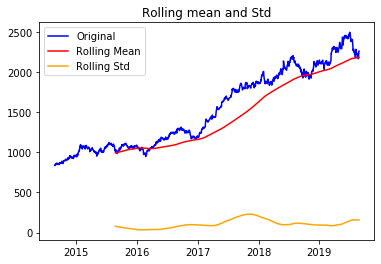

In [19]:
#Plotting Rolling Statistics :

orig=plt.plot(dfnew,color='blue',label='Original')
mean=plt.plot(rollingmean,color='red',label='Rolling Mean')
std=plt.plot(rollingstd,color='Orange',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and Std')
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller

print(" Results of Dickey- Fuller Test:")
dftest = adfuller(dfnew['Close'])

dfoutput=pd.Series(dftest[0:4],index=['Test statisctic','p-value','#lags used','number of observations used'])

for key,value in dftest[4].items():
    dfoutput['critical value (%s)' %key] =value

print(dfoutput)


 Results of Dickey- Fuller Test:
Test statisctic                  -0.358733
p-value                           0.916764
#lags used                        9.000000
number of observations used    1817.000000
critical value (1%)              -3.433954
critical value (5%)              -2.863132
critical value (10%)             -2.567618
dtype: float64


In [21]:
# Data is not Stationary because rolling mean is not constant , and from  Dickey- Fuller Test P- Values is > 0.5 

# Checking Seasonality and Trend

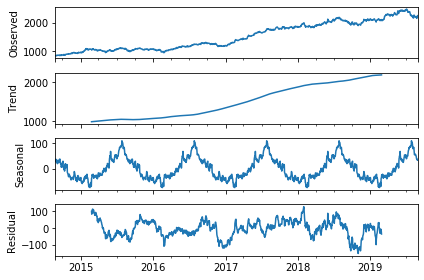

In [22]:
import statsmodels.api as sm
decomp= sm.tsa.seasonal_decompose(dfnew,freq=365)
# result = sm.tsa.stattools.adfuller(dfnew)
decomp.plot()
plt.show()

In [23]:
# We can observe the Trend is in upward direction and it has seasonality aswell

# Train and Test data Split

In [24]:
train=dfnew.loc['2014-08-27':'2019-02-26']
test=dfnew.loc['2019-02-27':'2019-08-27']

In [25]:
# Taking 6 months data as Testing data

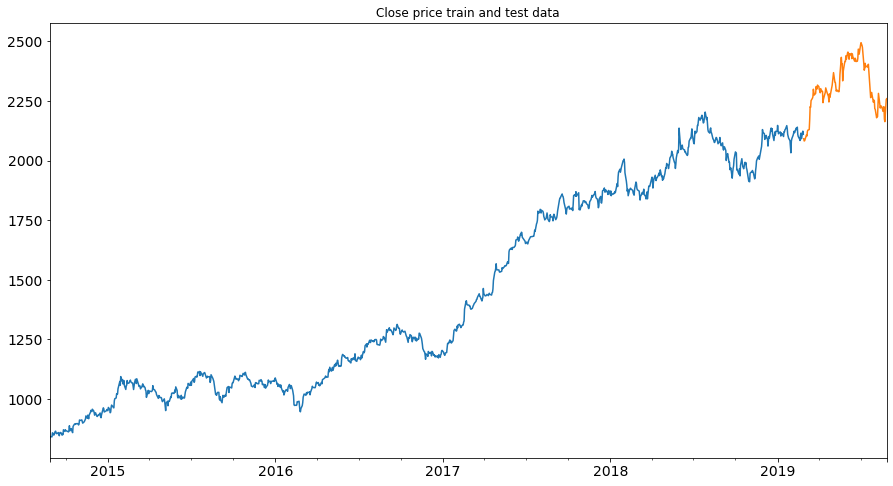

In [26]:
train.Close.plot(figsize=(15,8), title= 'Close price', fontsize=14)
test.Close.plot(figsize=(15,8), title= 'Close price train and test data', fontsize=14)
plt.show()

# Method 1 : REGRESSION ON TIME 

In [27]:
time = [i+1 for i in range(len(dfnew))]

In [28]:
df1 = dfnew.copy()
df1['time'] = time
df1.head()

,Close,time
2014-08-27,836.60,1
2014-08-28,842.95,2
2014-08-29,842.60,3
2014-08-30,842.25,4
2014-08-31,841.90,5


In [29]:
df1 = df1[['time', 'Close']]
df1.head()

,time,Close
2014-08-27,1,836.60
2014-08-28,2,842.95
2014-08-29,3,842.60
2014-08-30,4,842.25
2014-08-31,5,841.90


In [30]:
train_data=df1.loc['2014-08-27':'2019-02-26']
test_data=df1.loc['2019-02-27':'2019-08-27']

In [31]:
x_train = train_data.drop('Close', axis=1)
x_test = test_data.drop('Close', axis=1)
y_train = train_data[['Close']]
y_test = test_data[['Close']]

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
y_test['RegOnTime'] = predictions

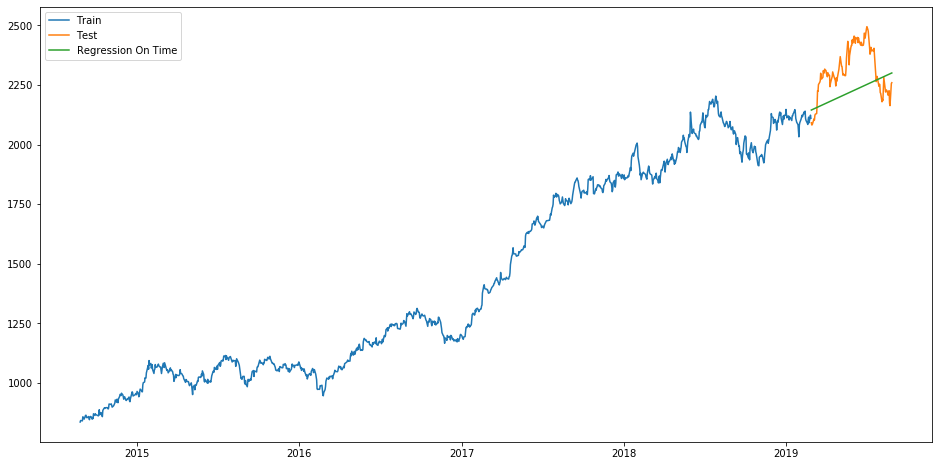

In [33]:
plt.figure(figsize=(16,8))
plt.plot( train_data['Close'], label='Train')
plt.plot(test_data['Close'], label='Test')
plt.plot(y_test['RegOnTime'], label='Regression On Time')
plt.legend(loc='best')
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_data.Close, y_test.RegOnTime))
rmse = round(rmse, 3)
rmse

133.273

In [35]:
abs_error = np.abs(y_test['Close']-y_test['RegOnTime'])
actual = y_test['Close']
mape = np.round(np.mean(abs_error/actual),3)
mape

0.05

In [36]:
resultsDf = pd.DataFrame({'Method':['Rregression on time'], 'MAPE': [mape], 'RMSE': [rmse]})
resultsDf = resultsDf[['Method', 'RMSE', 'MAPE']]
resultsDf

,Method,RMSE,MAPE
0,Rregression on time,133.273,0.05


# Method 2 : Naive Method

In [37]:
df_naive = dfnew[['Close']]
df_naive['trend']=np.nan
for i in range(len(df_naive)):
    if i == 0:
        df_naive['trend'] = np.nan
    else:
        df_naive['trend'][i] = df_naive.Close[i-1]

In [38]:
train_data=df_naive.loc['2014-08-27':'2019-02-26']
test_data=df_naive.loc['2019-02-27':'2019-08-27']

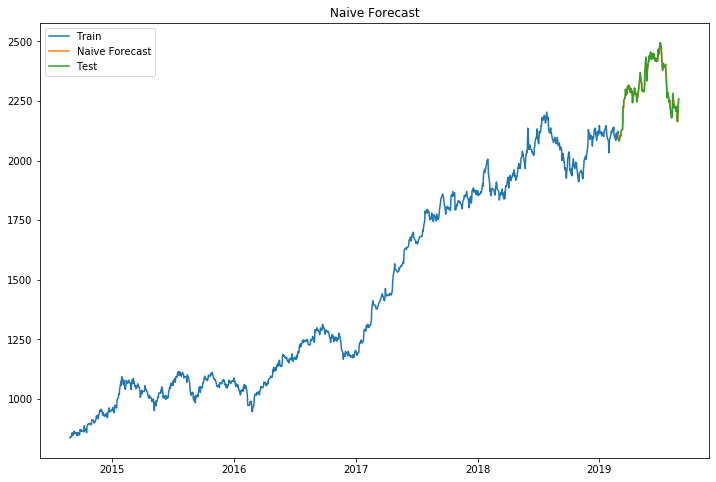

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index,test_data['trend'], label='Naive Forecast')
plt.plot(test_data.index,test_data['Close'], label='Test')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [40]:
from   sklearn.metrics  import mean_squared_error
MSE       =  mean_squared_error(test_data['Close'], test_data['trend'])
rmse      =  np.sqrt(MSE)
print('RMSE: ', rmse)

mape= np.mean(np.abs(test_data['Close']-test_data['trend'])/test_data['Close'])
print('MAPE: ',mape)

RMSE:  17.791629521883483
MAPE:  0.005587743953596565


In [41]:
tempResultsDf = pd.DataFrame({'Method':['Naive approach'], 'RMSE': [rmse],'MAPE': [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,RMSE,MAPE
0,Rregression on time,133.27300,0.050000
0,Naive approach,17.79163,0.005588


# 3.Simple Average Method

In [42]:
df_sa=dfnew[['Close']]
df_sa['trend']=np.nan
for i in range(len(dfnew)):
    df_sa['trend'][i] = round(dfnew.Close.mean())

In [43]:
df_sa.head()

,Close,trend
2014-08-27,836.60,1525.0
2014-08-28,842.95,1525.0
2014-08-29,842.60,1525.0
2014-08-30,842.25,1525.0
2014-08-31,841.90,1525.0


In [44]:
train=df_sa.loc['2014-08-27':'2019-02-26']
test=df_sa.loc['2019-02-27':'2019-08-27']

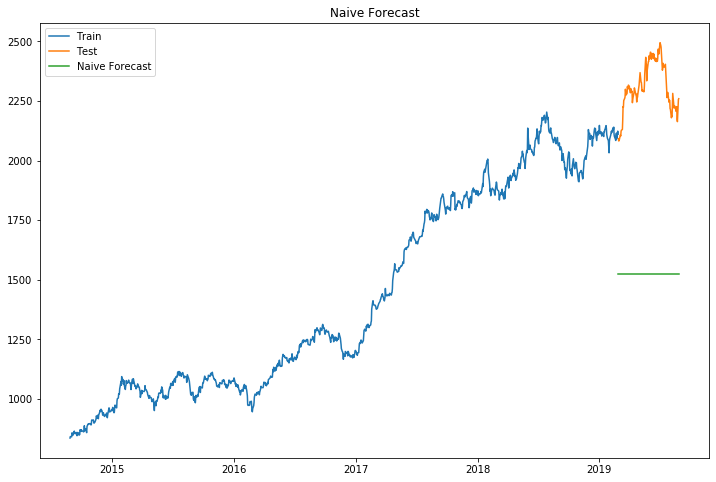

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index,test['Close'], label='Test')
plt.plot(test.index,test['trend'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [46]:
from   sklearn.metrics  import mean_squared_error
MSE       =  mean_squared_error(test['Close'], test['trend'])
rmse      =  np.sqrt(MSE)
print('RMSE: ', rmse)

mape= np.mean(np.abs(test['Close']-test['trend'])/test['Close'])
print('MAPE: ',mape)

RMSE:  793.9301819323888
MAPE:  0.33934146948886207


In [47]:
tempResultsDf = pd.DataFrame({'Method':['Simple Average'], 'RMSE': [rmse],'MAPE': [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,RMSE,MAPE
0,Rregression on time,133.273000,0.050000
0,Naive approach,17.791630,0.005588
0,Simple Average,793.930182,0.339341


# 4.Moving Average Method

In [48]:
df_ma = dfnew[['Close']]
df_ma['trend'] = df_ma['Close'].rolling(15).mean()

In [49]:
train=df_ma.loc['2014-08-27':'2019-02-26']
test=df_ma.loc['2019-02-27':'2019-08-27']

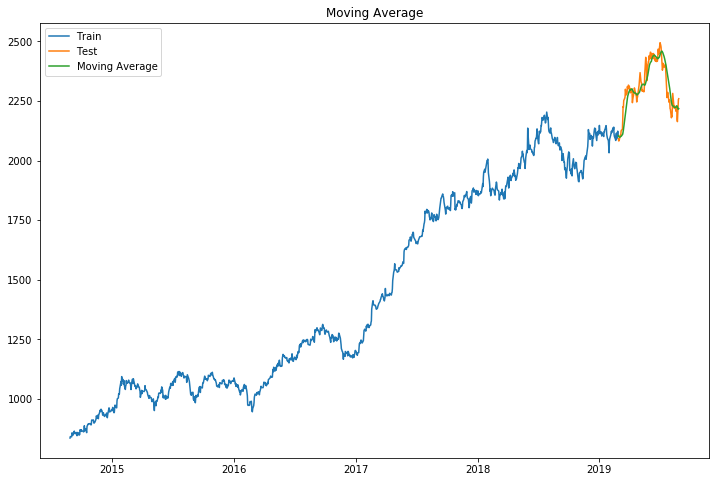

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index,test['Close'], label='Test')
plt.plot(test.index,test['trend'], label='Moving Average')
plt.legend(loc='best')
plt.title("Moving Average")
plt.show()

In [51]:
from   sklearn.metrics  import mean_squared_error
MSE       =  mean_squared_error(test['Close'], test['trend'])
rmse      =  np.sqrt(MSE)
print('RMSE: ', rmse)

mape= np.mean(np.abs(test['Close']-test['trend'])/test['Close'])
print('MAPE: ',mape)

RMSE:  43.217528220218526
MAPE:  0.014594027727260194


In [52]:
tempResultsDf = pd.DataFrame({'Method':['Moving Average'], 'RMSE': [rmse],'MAPE': [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,RMSE,MAPE
0,Rregression on time,133.273000,0.050000
0,Naive approach,17.791630,0.005588
0,Simple Average,793.930182,0.339341
0,Moving Average,43.217528,0.014594


# 5. Simple Exponential Smoothing

In [53]:
train=dfnew.loc['2014-08-27':'2019-02-26']
test=dfnew.loc['2019-02-27':'2019-08-27']

In [54]:
from statsmodels.tsa.api import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Close'])

In [55]:
# fit model
model_fit = model.fit(smoothing_level=0.6,optimized=False)
model_fit.params

{'smoothing_level': 0.6,
 'smoothing_slope': None,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 836.6,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [56]:
test['trend'] = model_fit.forecast(len(test['Close']))

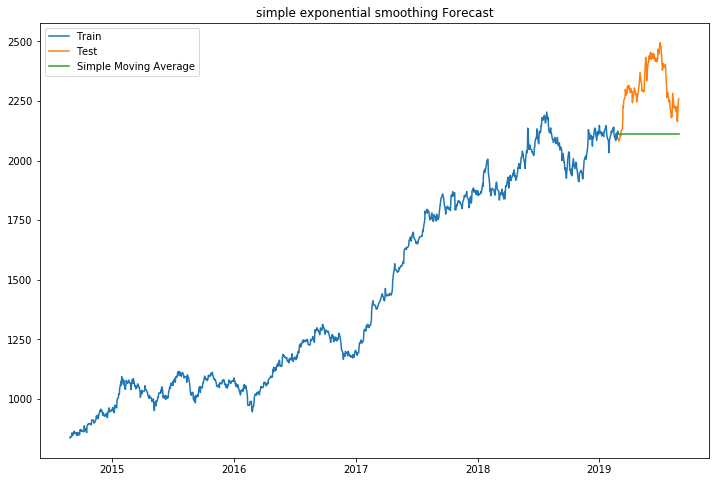

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index,test['Close'], label='Test')
plt.plot(test.index,test['trend'], label='Simple Moving Average')
plt.legend(loc='best')
plt.title("simple exponential smoothing Forecast")
plt.show()

In [58]:
from   sklearn.metrics  import mean_squared_error
MSE       =  mean_squared_error(test['Close'], test['trend'])
rmse      =  np.sqrt(MSE)
print('RMSE: ', rmse)

mape= np.mean(np.abs(test['Close']-test['trend'])/test['Close'])
print('MAPE: ',mape)

RMSE:  223.11863624226345
MAPE:  0.08538927706304493


In [59]:
tempResultsDf = pd.DataFrame({'Method':['Simple exponential Smoothing'], 'RMSE': [rmse],'MAPE': [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,RMSE,MAPE
0,Rregression on time,133.273000,0.050000
0,Naive approach,17.791630,0.005588
0,Simple Average,793.930182,0.339341
0,Moving Average,43.217528,0.014594
0,Simple exponential Smoothing,223.118636,0.085389


# 6. Holts Method

In [60]:
train=dfnew.loc['2014-08-27':'2019-02-26']
test=dfnew.loc['2019-02-27':'2019-08-27']

In [61]:
from statsmodels.tsa.api import ExponentialSmoothing
molts_model = ExponentialSmoothing(train[['Close']],trend='add', seasonal='none').fit()
molts_model.params

{'smoothing_level': 1.0,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 835.8259512248646,
 'initial_slope': 0.7747310911089933,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [62]:
test['trend'] = molts_model.forecast(len(test))

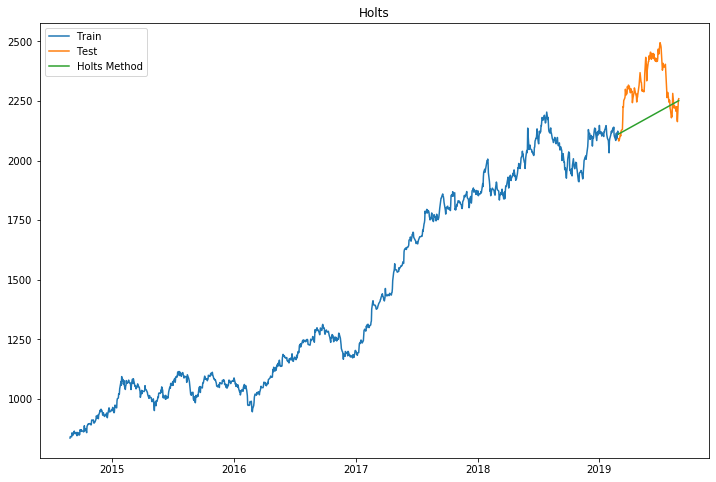

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index,test['Close'], label='Test')
plt.plot(test.index,test['trend'], label='Holts Method')
plt.legend(loc='best')
plt.title("Holts")
plt.show()

In [64]:
from   sklearn.metrics  import mean_squared_error
MSE       =  mean_squared_error(test['Close'], test['trend'])
rmse      =  np.sqrt(MSE)
print('RMSE: ', rmse)

mape= np.mean(np.abs(test['Close']-test['trend'])/test['Close'])
print('MAPE: ',mape)

RMSE:  163.68741516659355
MAPE:  0.059595143494231194


In [65]:
tempResultsDf = pd.DataFrame({'Method':['Holts Method'], 'RMSE': [rmse],'MAPE': [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,RMSE,MAPE
0,Rregression on time,133.273000,0.050000
0,Naive approach,17.791630,0.005588
0,Simple Average,793.930182,0.339341
0,Moving Average,43.217528,0.014594
0,Simple exponential Smoothing,223.118636,0.085389
0,Holts Method,163.687415,0.059595


# 7. Holts Winter Method - Additive

In [66]:
from statsmodels.tsa.api import SimpleExpSmoothing
holts_model = ExponentialSmoothing(train[['Close']],seasonal_periods=365 ,trend='add', seasonal='add').fit()
# holts_model.params

In [67]:
test['trend'] = holts_model.forecast(len(test))

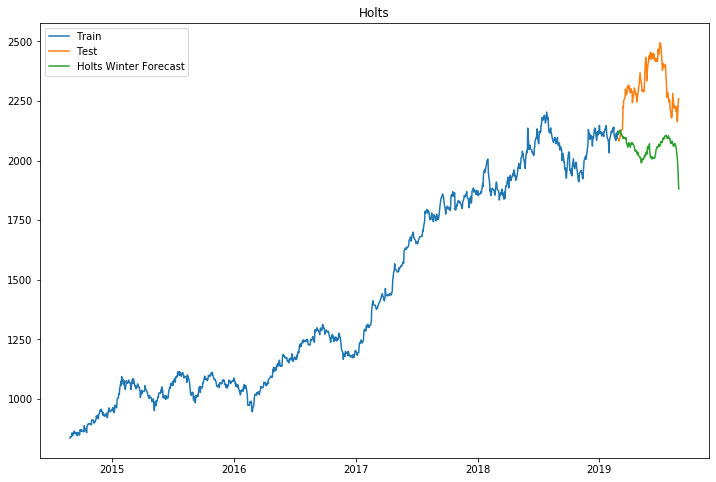

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index,test['Close'], label='Test')
plt.plot(test.index,test['trend'], label='Holts Winter Forecast')
plt.legend(loc='best')
plt.title("Holts")
plt.show()

In [69]:
from   sklearn.metrics  import mean_squared_error
MSE       =  mean_squared_error(test['Close'], test['trend'])
rmse      =  np.sqrt(MSE)
print('RMSE: ', rmse)

mape= np.mean(np.abs(test['Close']-test['trend'])/test['Close'])
print('MAPE: ',mape)

RMSE:  282.0969312619921
MAPE:  0.10991660518704732


In [70]:
tempResultsDf = pd.DataFrame({'Method':['Holts Winter - Additive'], 'RMSE': [rmse],'MAPE': [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,RMSE,MAPE
0,Rregression on time,133.273000,0.050000
0,Naive approach,17.791630,0.005588
0,Simple Average,793.930182,0.339341
0,Moving Average,43.217528,0.014594
0,Simple exponential Smoothing,223.118636,0.085389
0,Holts Method,163.687415,0.059595
0,Holts Winter - Additive,282.096931,0.109917


# 8. Holt-Winters Method - Multiplicative

In [71]:
train=dfnew.loc['2014-08-27':'2019-02-26']
test=dfnew.loc['2019-02-27':'2019-08-27']

In [72]:
from statsmodels.tsa.api import SimpleExpSmoothing
holts_model = ExponentialSmoothing(train['Close'],seasonal_periods=365 ,trend='add', seasonal='mul').fit()
# holts_model.params


In [73]:
test['trend'] = holts_model.forecast(len(test))

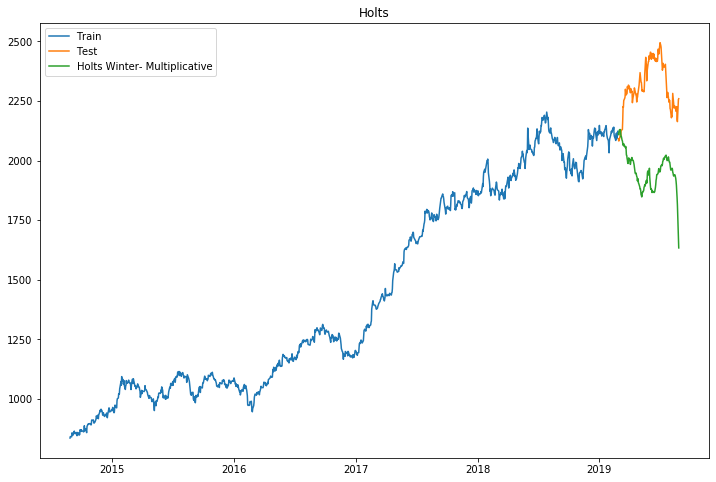

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index,test['Close'], label='Test')
plt.plot(test.index,test['trend'], label='Holts Winter- Multiplicative')
plt.legend(loc='best')
plt.title("Holts")
plt.show()

In [75]:
from   sklearn.metrics  import mean_squared_error
MSE       =  mean_squared_error(test['Close'], test['trend'])
rmse      =  np.sqrt(MSE)
print('RMSE: ', rmse)

mape= np.mean(np.abs(test['Close']-test['trend'])/test['Close'])
print('MAPE: ',mape)

RMSE:  385.0192498666233
MAPE:  0.15238414063937858


In [76]:
tempResultsDf = pd.DataFrame({'Method':['Holts Winter - Multiplicative'], 'RMSE': [rmse],'MAPE': [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,RMSE,MAPE
0,Rregression on time,133.273000,0.050000
0,Naive approach,17.791630,0.005588
0,Simple Average,793.930182,0.339341
0,Moving Average,43.217528,0.014594
0,Simple exponential Smoothing,223.118636,0.085389
0,Holts Method,163.687415,0.059595
0,Holts Winter - Additive,282.096931,0.109917
0,Holts Winter - Multiplicative,385.019250,0.152384


In [77]:
# Among all basic models Niave approach and moving Average are having RMSE values low

# 9.Autoregression (AR) Method

In [78]:
train=dfnew.loc['2014-08-27':'2019-02-26']
test=dfnew.loc['2019-02-27':'2019-08-27']

In [79]:
from statsmodels.tsa.ar_model import AR
from random import random

In [80]:
model = AR(train)
model_fit = model.fit()

In [81]:
#How many lags considered statistically, what are their beta values

print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 24
Coefficients: const        0.986591
L1.Close     1.057366
L2.Close    -0.048193
L3.Close     0.023118
L4.Close    -0.057633
L5.Close     0.024991
L6.Close     0.003695
L7.Close    -0.001836
L8.Close    -0.079166
L9.Close     0.009851
L10.Close    0.050760
L11.Close    0.032405
L12.Close    0.027769
L13.Close   -0.033112
L14.Close    0.005740
L15.Close   -0.008293
L16.Close    0.000264
L17.Close   -0.041198
L18.Close    0.017185
L19.Close    0.002932
L20.Close    0.012123
L21.Close    0.034950
L22.Close   -0.053237
L23.Close    0.057128
L24.Close   -0.037765
dtype: float64


In [82]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

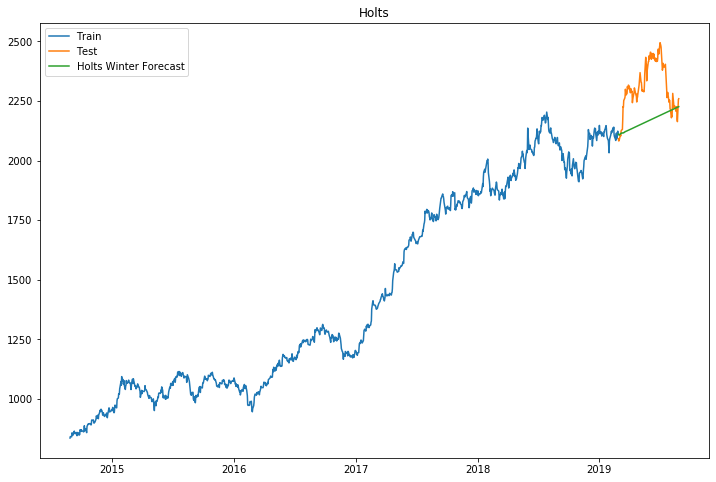

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index,test['Close'], label='Test')
plt.plot(test.index,predictions, label='Holts Winter Forecast')
plt.legend(loc='best')
plt.title("Holts")
plt.show()

In [84]:
#for i in range(len(predictions)):
    #print('predicted=%f, expected=%f' % (predictions.values[i], test.values[i]))

In [85]:
rmse = np.sqrt(mean_squared_error(test, predictions))
print('RMSE: ' , rmse)
mape='nan'

RMSE:  174.84039395383306


In [86]:
tempResultsDf = pd.DataFrame({'Method':['AR model'], 'RMSE': [rmse],'MAPE': [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,RMSE,MAPE
0,Rregression on time,133.273000,0.05
0,Naive approach,17.791630,0.00558774
0,Simple Average,793.930182,0.339341
0,Moving Average,43.217528,0.014594
0,Simple exponential Smoothing,223.118636,0.0853893
0,Holts Method,163.687415,0.0595951
0,Holts Winter - Additive,282.096931,0.109917
0,Holts Winter - Multiplicative,385.019250,0.152384
0,AR model,174.840394,nan


# 10.ARIMA model

In [87]:
# Checking for Auto Correlation 

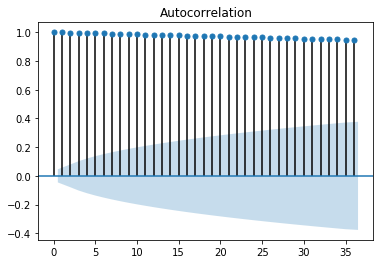

In [88]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

plot_acf(dfnew['Close'], lags=36)
plt.show()

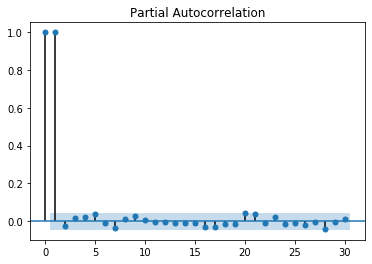

In [89]:
plot_pacf(dfnew, ax=pyplot.gca(),lags=30)
pyplot.show()

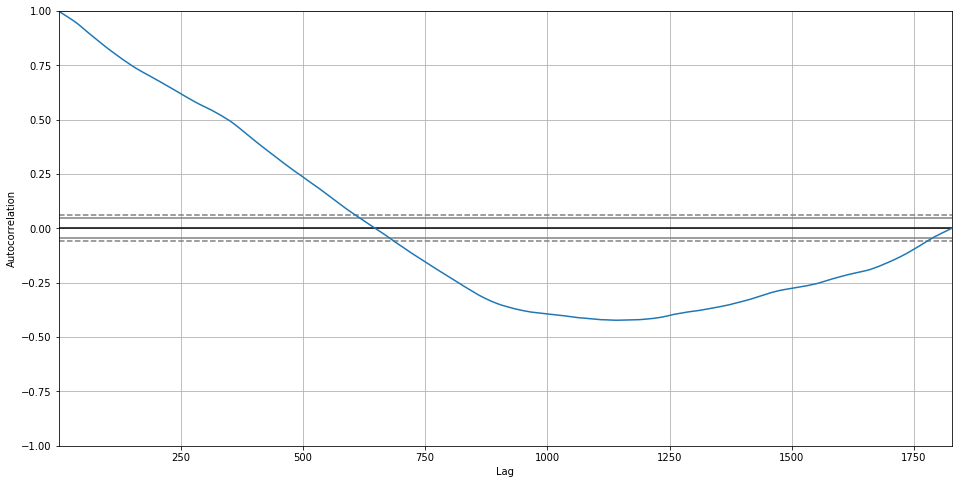

In [90]:
plt.figure(figsize=(16,8))
pd.plotting.autocorrelation_plot(dfnew['Close'])
plt.show()

In [91]:
# Log tranforming Data to make data Stationary 

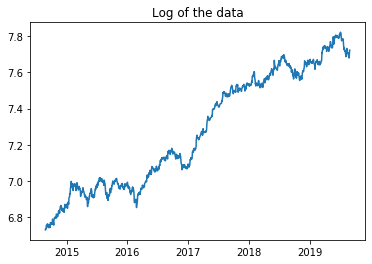

In [92]:
ts_log = np.log(dfnew.Close)
plt.title('Log of the data')
plt.plot(ts_log)
plt.show()

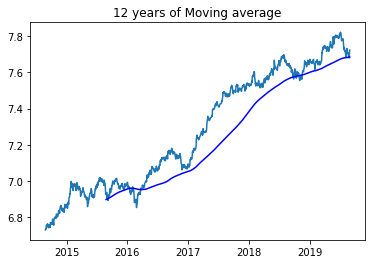

In [93]:
moving_avg = ts_log.rolling(365).mean()
plt.plot(ts_log)
plt.title('12 years of Moving average')
plt.plot(moving_avg, color='blue')
plt.show()

In [94]:
ts_log_moving_avg_diff = ts_log - moving_avg

In [95]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=365).mean()
    rolstd = timeseries.rolling(window=365).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

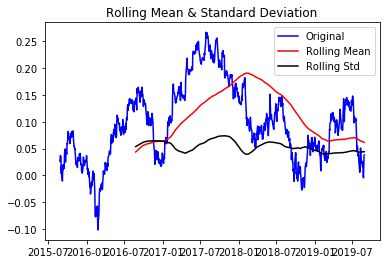

In [96]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

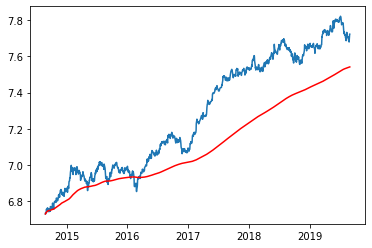

In [97]:
expwighted_avg = ts_log.ewm(halflife=365).mean()
#parameter halflife is used to define the amount of exponential decay
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
plt.show()

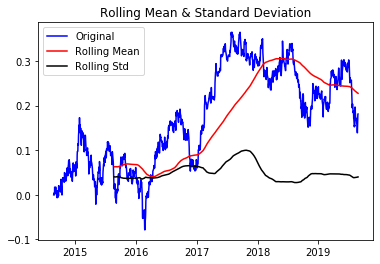

In [98]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

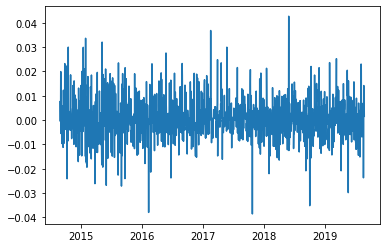

In [99]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

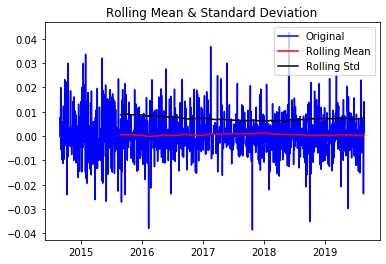

In [100]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

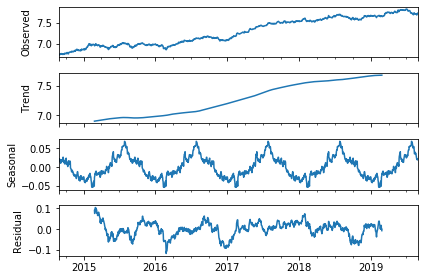

In [101]:
decomp= sm.tsa.seasonal_decompose(ts_log,freq=365)
decomp.plot()
plt.show()

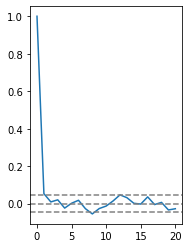

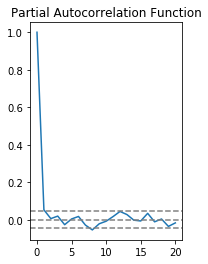

<Figure size 432x288 with 0 Axes>

In [102]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.show()
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()
plt.tight_layout()

In [103]:
# Finding best comnbination of p,d,q values for our ARIMA model 

In [104]:
p=d=q=range(0,5)
import itertools
val = list(itertools.product(p,d,q))

In [105]:
from statsmodels.tsa.arima_model import ARIMA


In [106]:
import warnings
warnings.filterwarnings('ignore')
for param in val:
    try:
        model_arima = ARIMA(ts_log,order = param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    
    except:
        continue

(0, 0, 0) 1018.6216716881135
(0, 0, 1) -1453.3398876094952
(0, 1, 0) -12718.25688741537
(0, 1, 1) -12721.336685419054
(0, 1, 2) -12719.42274884702
(0, 1, 3) -12718.337624473934
(0, 1, 4) -12717.480900292801
(0, 2, 0) -11545.254036735376
(0, 2, 1) -12686.975396058508
(0, 2, 2) -12695.546613592727
(1, 0, 0) -12705.21449074566
(1, 0, 1) -12709.265629092522
(1, 0, 2) -12707.506145712901
(1, 0, 3) -12706.829175135095
(1, 0, 4) -12705.583140811821
(1, 1, 0) -12721.402626169143
(1, 1, 1) -12719.542005097781
(1, 2, 0) -12013.919400630912
(1, 2, 1) -12702.115125261753
(1, 2, 2) -12696.589598971088
(1, 2, 3) -12696.020564442595
(1, 2, 4) -12695.68303563818
(2, 0, 0) -12709.400497440358
(2, 0, 1) -12707.844611768734
(2, 0, 2) -12705.894265035586
(2, 0, 3) -12705.298947055104
(2, 0, 4) -12703.60157249184
(2, 1, 0) -12719.47293003168
(2, 1, 1) -12717.56409808775
(2, 1, 2) -12716.242777051168
(2, 2, 0) -12225.412175985777
(2, 2, 1) -12701.111253275427
(2, 2, 2) -12699.18696883948
(2, 2, 3) -12688.63

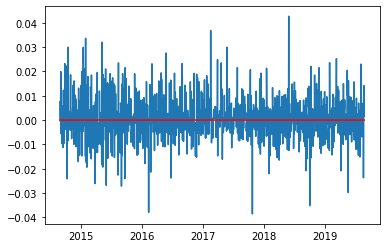

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                 1825
Model:                 ARIMA(0, 2, 0)   Log Likelihood                5774.627
Method:                           css   S.D. of innovations              0.010
Date:                Fri, 30 Aug 2019   AIC                         -11545.254
Time:                        17:39:02   BIC                         -11534.235
Sample:                    08-29-2014   HQIC                        -11541.189
                         - 08-27-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.306e-06      0.000     -0.014      0.989      -0.000       0.000


In [107]:
model = ARIMA(ts_log, order=(0,2,0), freq=ts_log.index.inferred_freq)  
results_ARIMA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.show()
print(results_ARIMA.summary())

# Auto Arima , SARIMAX

In [108]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(dfnew, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=14074.247, BIC=14101.763, Fit time=3.409 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=15199.594, BIC=15210.601, Fit time=0.079 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=14726.251, BIC=14748.264, Fit time=1.297 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=14073.574, BIC=14095.587, Fit time=4.765 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=14073.286, BIC=14100.802, Fit time=5.448 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=14727.141, BIC=14749.154, Fit time=1.240 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=14076.863, BIC=14109.883, Fit time=4.941 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=15191.137, BIC=15207.647, Fit time=0.412 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=14077.219, BIC=14115.742, Fit time=6.217 seconds
Fit ARIMA:

In [109]:
stepwise_model.aic()

14073.285749967476

In [110]:
predictions = stepwise_model.predict(n_periods=30)

In [111]:
future_dates = pd.date_range(start='28/08/2019', freq='D', periods=len(predictions))
future_dates

DatetimeIndex(['2019-08-28', '2019-08-29', '2019-08-30', '2019-08-31',
               '2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04',
               '2019-09-05', '2019-09-06', '2019-09-07', '2019-09-08',
               '2019-09-09', '2019-09-10', '2019-09-11', '2019-09-12',
               '2019-09-13', '2019-09-14', '2019-09-15', '2019-09-16',
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-21', '2019-09-22', '2019-09-23', '2019-09-24',
               '2019-09-25', '2019-09-26'],
              dtype='datetime64[ns]', freq='D')

In [112]:
print(stepwise_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                 1827
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -7031.643
Date:                            Fri, 30 Aug 2019   AIC                          14073.286
Time:                                    17:40:11   BIC                          14100.802
Sample:                                         0   HQIC                         14083.439
                                           - 1827                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0010      0.005      0.177      0.859      -0.010       0.012
ma.L1          0.0888      0.016   

# Predictions of Stock prices for Next 30 days using SARIMA model

In [113]:
future_forecast = pd.DataFrame(predictions,index=future_dates)
future_forecast.columns=['prediction']
future_forecast

,prediction
2019-08-28,2259.457590
2019-08-29,2260.567328
2019-08-30,2263.226545
2019-08-31,2263.926224
2019-09-01,2265.804553
2019-09-02,2265.808266
2019-09-03,2264.874543
2019-09-04,2264.992865
2019-09-05,2266.448847
2019-09-06,2266.986600


In [114]:
data = pd.DataFrame(predictions,index=future_dates)
data.columns=['Close']

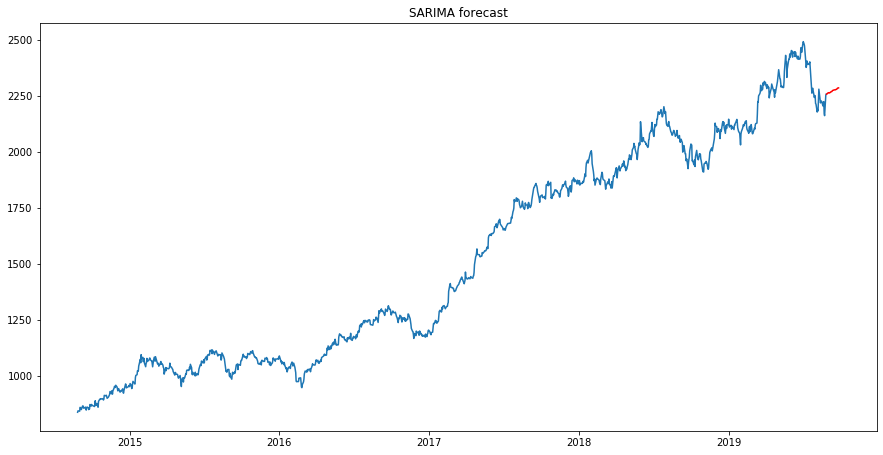

In [115]:
plt.figure(figsize=(15,7.5))
plt.title("SARIMA forecast")
plt.plot(dfnew.Close)
plt.plot(data,color = 'red')
plt.show()

In [116]:
dfh=dfnew['2019-01-01':'2019-08-27']

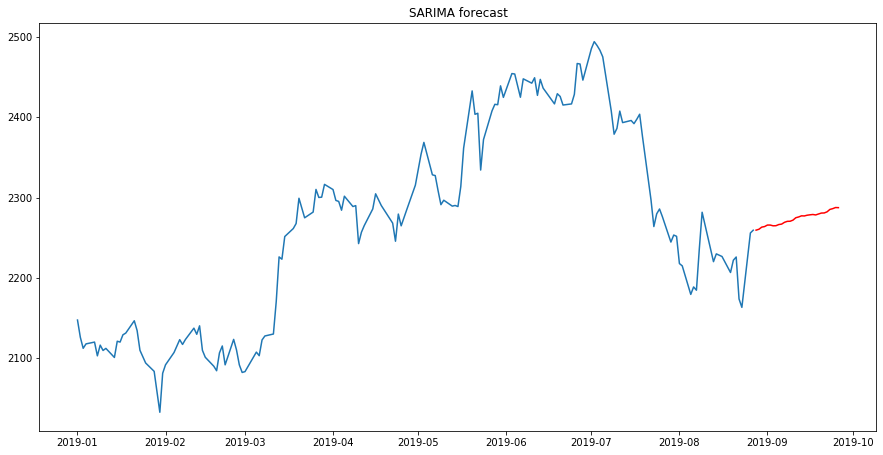

In [117]:
plt.figure(figsize=(15,7.5))
plt.title("SARIMA forecast")
plt.plot(dfh.Close)
plt.plot(data,color = 'red')
plt.show()